<a href="https://colab.research.google.com/github/AzamChatrAzar/project1/blob/main/Graph3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Graph image saved to random_graph_with_loop.png


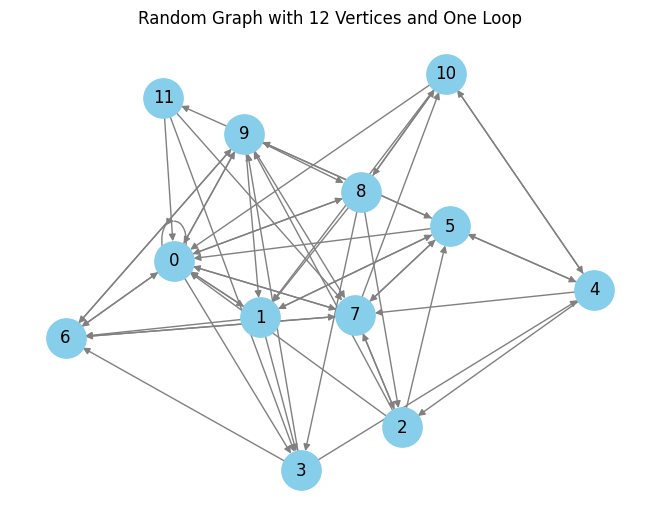

In [78]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def generate_random_graph():
    # ایجاد یک گراف جهت‌دار
    graph = nx.DiGraph()

    # اضافه کردن 12 رأس
    for i in range(12):
        graph.add_node(i)

    # اضافه کردن یال‌ها به صورت تصادفی
    for i in range(12):
        num_edges = random.randint(3, 7)  # تعداد یال‌های خروجی هر راس رو تصادفی انتخاب میکنیم
        targets = random.sample(range(12), num_edges) # انتخاب تصادفی هدف ها
        for target in targets:
            if target != i:
                graph.add_edge(i, target)

    # اطمینان از وجود یال ورودی به همه راس ها
    for i in range(12):
        if graph.in_degree(i) == 0:
            source = random.choice(range(12))
            graph.add_edge(source, i)

    # انتخاب یک راس تصادفی برای ایجاد حلقه
    loop_node = random.choice(range(12))
    graph.add_edge(loop_node, loop_node)

    return graph

# تولید گراف
graph = generate_random_graph()

# نمایش گراف (اختیاری)
pos = nx.spring_layout(graph)  # تعیین موقعیت گره‌ها برای نمایش بهتر
nx.draw(graph, pos, with_labels=True, node_color='skyblue', node_size=800, edge_color='gray', arrows=True)
plt.title("Random Graph with 12 Vertices and One Loop")

# ذخیره تصویر گراف (اختیاری)
plt.savefig("random_graph_with_loop.png")
print("Graph image saved to random_graph_with_loop.png")

plt.show()


In [79]:
import networkx as nx

def print_adjacency_matrix(graph):
    # ایجاد ماتریس مجاورت
    adjacency_matrix = nx.to_numpy_array(graph)

    # چاپ ماتریس مجاورت
    print("Adjacency Matrix:")
    for row in adjacency_matrix:
        print(row.tolist())  # تبدیل numpy array به list برای چاپ بهتر


print_adjacency_matrix(graph)


Adjacency Matrix:
[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]
[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]
[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
[1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0]
[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]


In [80]:
import numpy as np
import networkx as nx

def calculate_transition_matrix(graph):
    # محاسبه درجه خروجی هر راس (با استفاده از networkx)
    out_degree = dict(graph.out_degree())

    # تعداد گره ها را می گیریم
    num_nodes = graph.number_of_nodes()

    # ایجاد ماتریس انتقال
    P = np.zeros((num_nodes, num_nodes))

    # پر کردن ماتریس انتقال
    for u, v in graph.edges():
        P[u][v] = 1 / out_degree[u]

    return P


# حالا ماتریس انتقال رو محاسبه میکنیم:
transition_matrix = calculate_transition_matrix(graph)
print("ماتریس انتقال (P):")
print(transition_matrix)

ماتریس انتقال (P):
[[0.14285714 0.14285714 0.         0.14285714 0.         0.
  0.14285714 0.14285714 0.14285714 0.14285714 0.         0.        ]
 [0.25       0.         0.         0.25       0.         0.25
  0.25       0.         0.         0.         0.         0.        ]
 [0.25       0.         0.         0.         0.         0.25
  0.         0.25       0.         0.25       0.         0.        ]
 [0.         0.         0.         0.         0.33333333 0.
  0.33333333 0.         0.         0.33333333 0.         0.        ]
 [0.         0.         0.25       0.         0.         0.25
  0.         0.25       0.         0.         0.25       0.        ]
 [0.2        0.2        0.         0.         0.2        0.
  0.         0.2        0.         0.2        0.         0.        ]
 [0.33333333 0.         0.         0.         0.         0.
  0.         0.33333333 0.         0.33333333 0.         0.        ]
 [0.2        0.         0.2        0.         0.         0.2
  0.2      

In [81]:
import numpy as np
import networkx as nx

def calculate_transition_matrix(graph):
    # محاسبه درجه خروجی هر راس (با استفاده از networkx)
    out_degree = dict(graph.out_degree())
    num_nodes = graph.number_of_nodes()

    # ایجاد ماتریس انتقال
    P = np.zeros((num_nodes, num_nodes))

    # پر کردن ماتریس انتقال
    for u, v in graph.edges():
        P[u][v] = 1 / out_degree[u]

    return P

# ایجاد گراف تصادفی (می‌توانید این قسمت را تغییر دهید)
num_nodes = 12  # تعداد گره‌ها
graph = nx.erdos_renyi_graph(num_nodes, 0.5, directed=True)  # گراف تصادفی جهت‌دار

# محاسبه ماتریس انتقال
P = calculate_transition_matrix(graph)

# پارامتر alpha
alpha = 0.85

# ماتریس اتصال یکنواخت (Teleportation)
teleport = np.ones((num_nodes, num_nodes)) / num_nodes

# محاسبه ماتریس P_alpha
P_alpha = alpha * P + (1 - alpha) * teleport

# نمایش ماتریس P_alpha
print(f"ماتریس انتقال پیج رنک (P_alpha) با آلفا = {alpha}:")
print(np.round(P_alpha, 4))

ماتریس انتقال پیج رنک (P_alpha) با آلفا = 0.85:
[[0.0125 0.0125 0.0125 0.0125 0.0125 0.1825 0.0125 0.1825 0.1825 0.0125
  0.1825 0.1825]
 [0.1188 0.0125 0.1188 0.1188 0.0125 0.1188 0.1188 0.0125 0.1188 0.0125
  0.1188 0.1188]
 [0.0125 0.1825 0.0125 0.1825 0.1825 0.0125 0.0125 0.0125 0.0125 0.1825
  0.1825 0.0125]
 [0.1542 0.1542 0.0125 0.0125 0.1542 0.0125 0.1542 0.0125 0.1542 0.0125
  0.0125 0.1542]
 [0.1825 0.1825 0.0125 0.0125 0.0125 0.0125 0.1825 0.1825 0.0125 0.0125
  0.1825 0.0125]
 [0.0125 0.1542 0.0125 0.0125 0.0125 0.0125 0.1542 0.1542 0.1542 0.1542
  0.1542 0.0125]
 [0.1825 0.0125 0.0125 0.0125 0.1825 0.0125 0.0125 0.1825 0.1825 0.0125
  0.1825 0.0125]
 [0.1069 0.1069 0.0125 0.1069 0.1069 0.1069 0.1069 0.0125 0.1069 0.0125
  0.1069 0.1069]
 [0.0125 0.225  0.0125 0.0125 0.225  0.225  0.0125 0.225  0.0125 0.0125
  0.0125 0.0125]
 [0.0125 0.1825 0.0125 0.0125 0.1825 0.0125 0.1825 0.0125 0.1825 0.0125
  0.0125 0.1825]
 [0.4375 0.0125 0.4375 0.0125 0.0125 0.0125 0.0125 0.0125 0.01

In [82]:

from numpy.linalg import eig, matrix_rank

# 2. محاسبه مقدار ویژه ماکس و بردار ویژه برای P_alpha
eigenvalues, eigenvectors = eig(P_alpha)
max_idx = np.argmax(np.abs(eigenvalues))
lambda_max = eigenvalues[max_idx]
v_max = eigenvectors[:, max_idx].reshape(-1, 1)

print(f"مقدار ویژه ماکس P_alpha: {lambda_max:.4f}")
print(f"بردار ویژه متناظر:\n{v_max}\n")


مقدار ویژه ماکس P_alpha: 1.0000+0.0000j
بردار ویژه متناظر:
[[0.28867513+0.j]
 [0.28867513+0.j]
 [0.28867513+0.j]
 [0.28867513+0.j]
 [0.28867513+0.j]
 [0.28867513+0.j]
 [0.28867513+0.j]
 [0.28867513+0.j]
 [0.28867513+0.j]
 [0.28867513+0.j]
 [0.28867513+0.j]
 [0.28867513+0.j]]



In [83]:
# 3. تولید 50 چندجمله‌ای تصادفی غیرثابت
def generate_polynomials(num_polys=50, degree=12):
    polynomials = []
    while len(polynomials) < num_polys:
        coeffs = np.random.randint(0, 2, size=degree+1)
        if np.any(coeffs[1:]):  # حداقل یک ضریب غیرثابت
            polynomials.append(coeffs)
    return polynomials

polynomials = generate_polynomials(50)

In [84]:
# 4. تحلیل استقلال خطی بردارهای ویژه
independent_polys = []

for i, coeffs in enumerate(polynomials):
    # محاسبه h(P_alpha)
    hP = sum(c * np.linalg.matrix_power(P_alpha, p)
             for p, c in enumerate(coeffs) if c != 0)

    # محاسبه مقادیر ویژه و بردارهای ویژه
    h_eigenvalues, h_eigenvectors = eig(hP)
    h_max_idx = np.argmax(np.abs(h_eigenvalues))
    h_lambda_max = h_eigenvalues[h_max_idx]
    h_v_max = h_eigenvectors[:, h_max_idx].reshape(-1, 1)

    # بررسی استقلال خطی
    matrix_for_rank = np.hstack([v_max, h_v_max])
    if matrix_rank(matrix_for_rank) == 2:
        independent_polys.append({
            'polynomial': coeffs,
            'lambda_max': h_lambda_max,
            'eigenvector': h_v_max
        })

In [85]:
# 5. نمایش نتایج
print(f"از {len(polynomials)} چندجمله‌ای، {len(independent_polys)} مورد بردار ویژه مستقل تولید کردند:")
for i, item in enumerate(independent_polys[:5]):  # نمایش 5 مورد اول
    print(f"\nچندجمله‌ای {i+1}: {item['polynomial']}")
    print(f"مقدار ویژه ماکس: {item['lambda_max']:.4f}")
    print(f"بردار ویژه:\n{item['eigenvector']}")

از 50 چندجمله‌ای، 0 مورد بردار ویژه مستقل تولید کردند:
